### Datacamp Facebook Resolution
- https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

<b> Stationarity and differencing </b>
- https://www.otexts.org/fpp/8/1

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('../Datasets/multiTimeline.csv', skiprows=1)
df.head(2)

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


#### Wrangle Data

In [4]:
df.columns = ['month', 'diet', 'gym', 'finance']
df.head(2)

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49


In [5]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)
df.head(2)

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49


#### Exploratory Data Analysis (EDA)

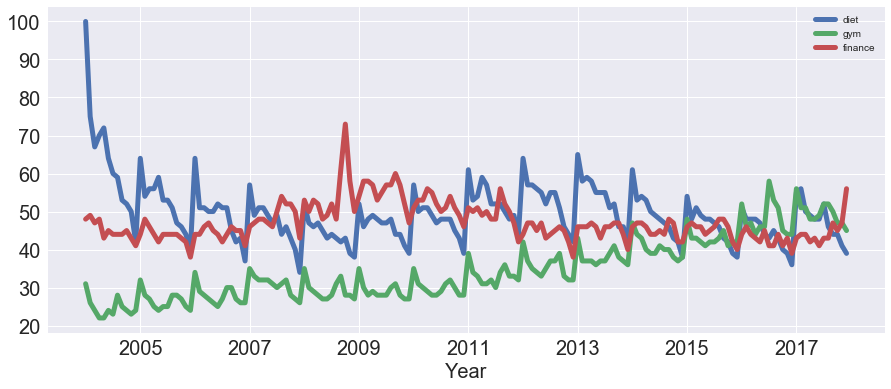

In [6]:
df.plot(figsize=(15,6), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.show()

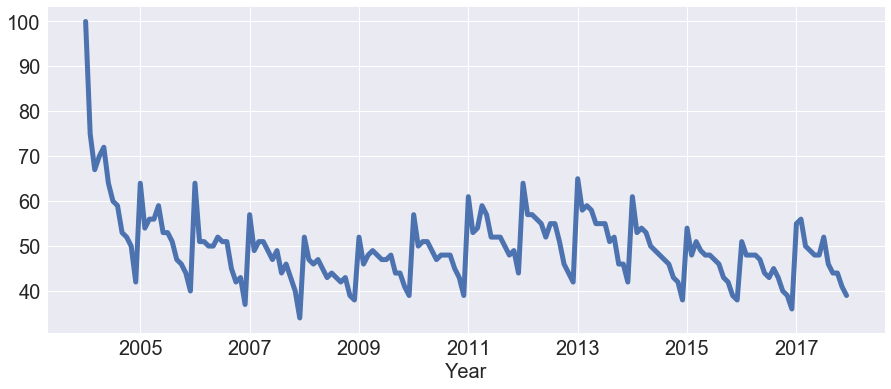

In [7]:
df['diet'].plot(figsize=(15,6), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.show()

#### Freq Table

In [8]:
# df.groupby(['diet']).size().sort_values(ascending =False)
# df.groupby(['diet']).size()

In [9]:
freq_table = df.apply(pd.value_counts).fillna(0).reset_index()
freq_table.rename(columns={'index': 'Freq'}, inplace=True)

cols = freq_table.columns.tolist()
cols = cols[1:] + cols[:1]

freq_table = freq_table[cols]
freq_table.head(2)

,diet,gym,finance,Freq
0,0.0,2.0,0.0,22
1,0.0,2.0,0.0,23


#### Trends and Seasonality in Time Series Data

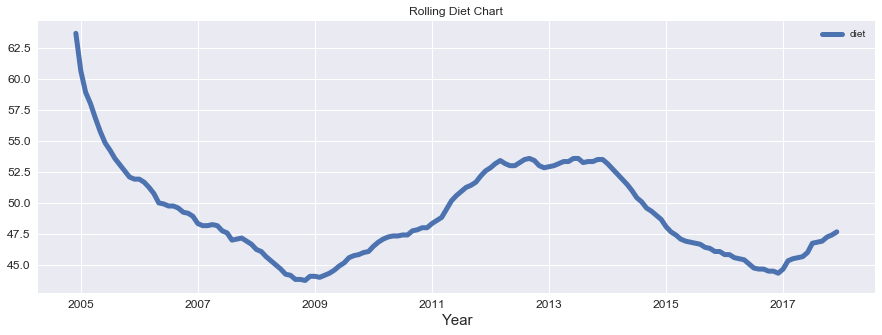

In [10]:
diet = df[['diet']]
diet_roll = diet.rolling(12).mean()
diet_roll.dropna(inplace=True)
diet_roll.plot(figsize=(15,5), linewidth=5, fontsize=12)
plt.xlabel('Year', fontsize=15);
plt.title('Rolling Diet Chart')
plt.show()

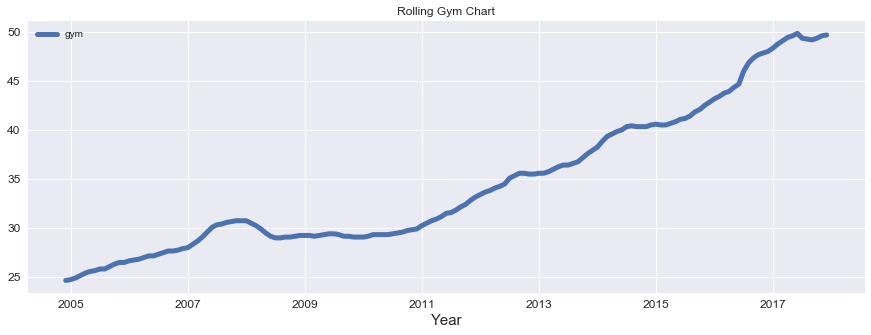

In [11]:
gym = df[['gym']]
gym_roll = gym.rolling(12).mean()
gym_roll.dropna(inplace=True)
gym_roll.plot(figsize=(15,5), linewidth=5, fontsize=12)
plt.xlabel('Year', fontsize=15);
plt.title('Rolling Gym Chart')
plt.show()

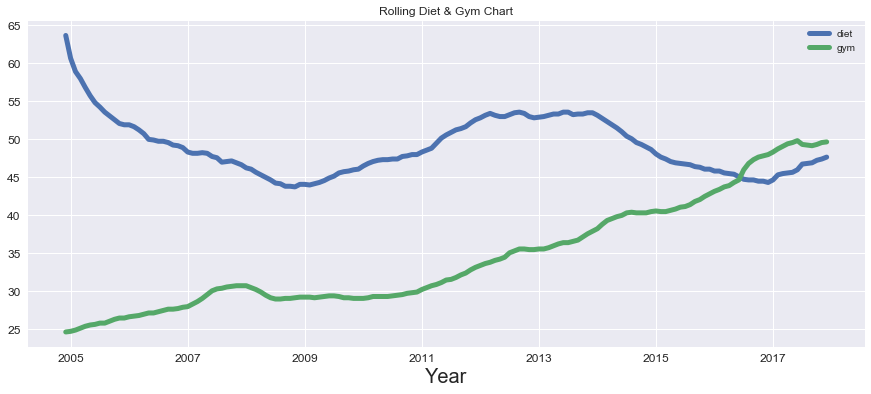

In [12]:
df_rm = pd.concat([diet_roll, gym_roll], axis=1)
df_rm.plot(figsize=(15,6), linewidth=5, fontsize=12)
plt.xlabel('Year', fontsize=20);
plt.title('Rolling Diet & Gym Chart')
plt.show()

#### Seasonal Patterns in Time Series Data

One way to think about the seasonal components to the time series of your data is to remove the trend from a time series, so that you can more easily investigate seasonality. To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal. This, however, will be dependent on how many data points you averaged over.

Another way to remove the trend is called "differencing", where you look at the difference between successive data points (called "first-order differencing", because you're only looking at the difference between one data point and the one before it).

<b> First-order differencing </b>

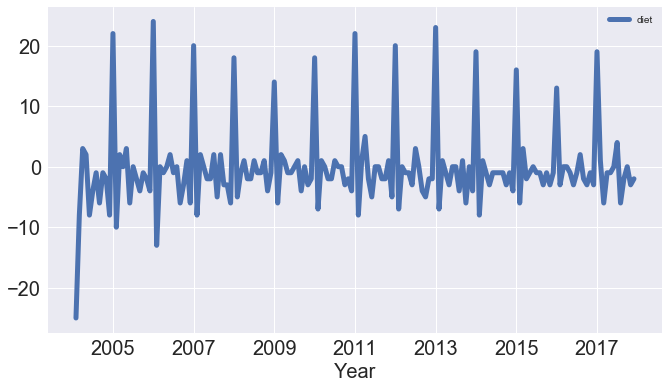

In [14]:
diet.diff().plot(figsize=(11,6), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

See that we have removed much of the trend and you can really see the peaks in January every year. Each January, there is a huge spike of 20 or more percent on the highest search item.

Note: we can also perform 2nd order differencing, which means that we would be looking at the difference between one data point and the two that precede it, if the trend is not yet entirely removed.

Differencing is super helpful in turning your time series into a stationary time series. 

<b> Periodicity and Autocorrelation </b>

A time series is periodic if it repeats itself at equally spaced intervals, say, every 12 months. 

In [16]:
from sklearn import datasets
iris = datasets.load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df_iris.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0


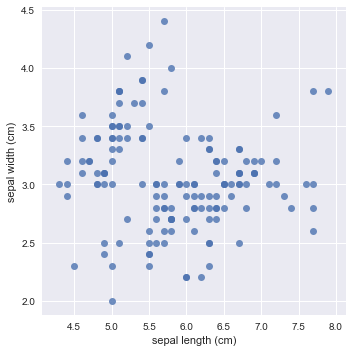

In [19]:
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', fit_reg=False, data=df_iris);

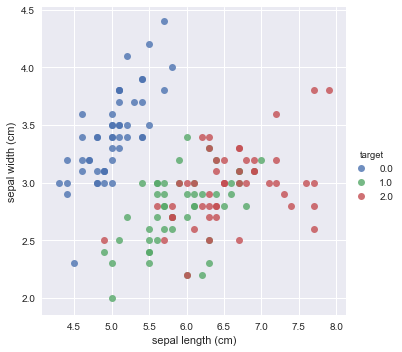

In [20]:
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', fit_reg=False, data=df_iris, hue='target');

In [21]:
df_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


In [22]:
df_iris.groupby(['target']).corr()

petal length (cm)  petal width (cm)  \
target                                                          
0.0    petal length (cm)           1.000000          0.306308   
       petal width (cm)            0.306308          1.000000   
       sepal length (cm)           0.263874          0.279092   
       sepal width (cm)            0.176695          0.279973   
1.0    petal length (cm)           1.000000          0.786668   
       petal width (cm)            0.786668          1.000000   
       sepal length (cm)           0.754049          0.546461   
       sepal width (cm)            0.560522          0.663999   
2.0    petal length (cm)           1.000000          0.322108   
       petal width (cm)            0.322108          1.000000   
       sepal length (cm)           0.864225          0.281108   
       sepal width (cm)            0.401045          0.537728   

                          sepal length (cm)  sepal width (cm)  
target                                                         
0.0    petal length (cm)           0.263874          0.176695  
       petal width (cm)            0.279092          0.279973  
       sepal length (cm)           1.000000          0.746780  
       sepal width (cm)            0.746780          1.000000  
1.0    petal length (cm)           0.754049          0.560522  
       petal width (cm)            0.546461          0.663999  
       sepal length (cm)           1.000000          0.525911  
       sepal width (cm)            0.525911          1.000000  
2.0    petal length (cm)           0.864225          0.401045  
       petal width (cm)            0.281108          0.537728  
       sepal length (cm)           1.000000          0.457228  
       sepal width (cm)            0.457228          1.000000

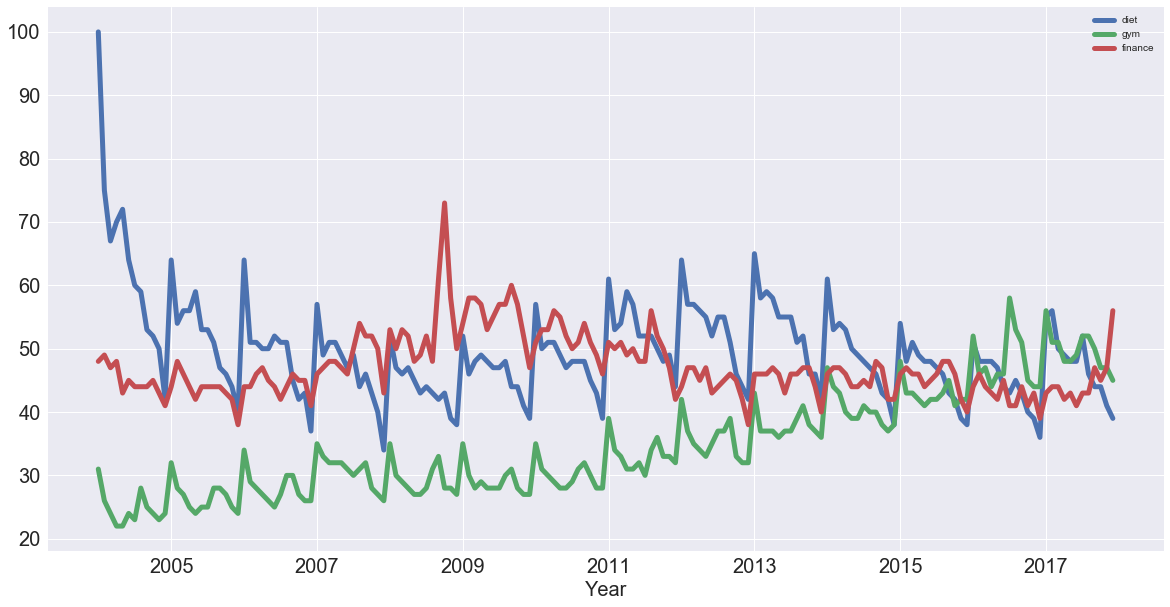

In [23]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [24]:
df.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


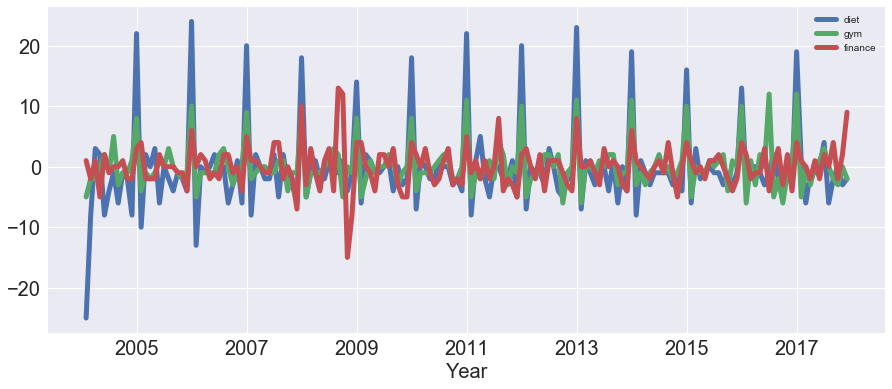

In [26]:
df.diff().plot(figsize=(15,6), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [27]:
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


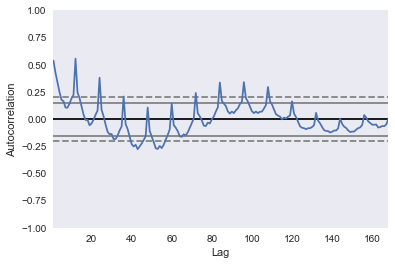

In [28]:
# autocorrelation_plot
pd.plotting.autocorrelation_plot(diet);